In [ ]:
!pip install contractions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
root = '/content/drive/My Drive/surely_not_sarcasm_data/'

In [3]:
!cp -r '$root/utils' .

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
import pickle

from sklearn.metrics import f1_score, accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Embedding, GRU, LSTM, Dropout
from tensorflow.keras.layers import Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L1L2

from utils.preprocessing import tokenize, WordEmbeddings
from utils.evaluation import plot_history, evaluate, show_errors

sns.set_style('whitegrid');
sns.set_context('notebook', font_scale=1.1);

# prepare data

In [7]:
raw_data = pickle.load(open(root+'raw_data_2103', 'rb'))
data = pickle.load(open(root+'preprocessed_data_2103', 'rb'))

In [8]:
input_dim = 10000

In [9]:
tokenizers, tokenized_data = tokenize(data, input_dim, quantile=0.9)

In [10]:
maxlen = tokenized_data['X_train'].shape[1]
maxlen_parent = tokenized_data['X_train_par'].shape[1]

# embedding matrices

In [11]:
vec_len = 100

In [12]:
wordemb = WordEmbeddings()
emb_matrix_comment = wordemb.get_glove_embeddings(input_dim, vec_len, tokenizers['comment'], root=root)

coverage: 0.9815


In [13]:
wordemb = WordEmbeddings()
emb_matrix_parent = wordemb.get_glove_embeddings(input_dim, vec_len, tokenizers['parent'], root=root)

coverage: 0.9893


# no context

## non-pretrained embeddings
*up to date (25.03.2022)*

In [ ]:
model = Sequential([
    Embedding(input_dim=input_dim, output_dim=100, input_length=maxlen,
              mask_zero=True, embeddings_regularizer=L1L2(l1=5e-6, l2=5e-6)),
    GRU(100, dropout=0.4),
    Dense(1, activation='sigmoid')
])

es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, restore_best_weights=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit = model.fit(tokenized_data['X_train'], data['y_train'], batch_size=128, epochs=50, callbacks=[es],
                validation_data=(tokenized_data['X_val'], data['y_val']))

Epoch 1/50
6002/6002 [==============================] - 521s 85ms/step - loss: 0.6144 - accuracy: 0.7047 - val_loss: 0.6004 - val_accuracy: 0.7187
Epoch 2/50
6002/6002 [==============================] - 512s 85ms/step - loss: 0.5994 - accuracy: 0.7204 - val_loss: 0.5910 - val_accuracy: 0.7277
Epoch 3/50
6002/6002 [==============================] - 520s 87ms/step - loss: 0.5948 - accuracy: 0.7265 - val_loss: 0.5894 - val_accuracy: 0.7306
Epoch 4/50
6002/6002 [==============================] - 512s 85ms/step - loss: 0.5919 - accuracy: 0.7305 - val_loss: 0.5861 - val_accuracy: 0.7342
Epoch 5/50
6002/6002 [==============================] - 511s 85ms/step - loss: 0.5901 - accuracy: 0.7342 - val_loss: 0.5841 - val_accuracy: 0.7372
Epoch 6/50
6002/6002 [==============================] - 547s 91ms/step - loss: 0.5885 - accuracy: 0.7364 - val_loss: 0.5848 - val_accuracy: 0.7378
Epoch 7/50
6002/6002 [==============================] - 499s 83ms/step - loss: 0.5879 - accuracy: 0.7381 - val_loss: 0

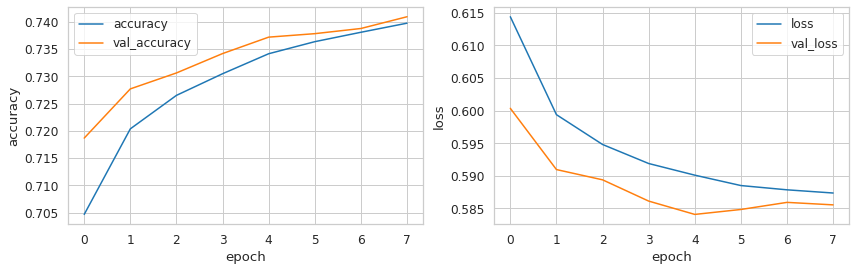

In [ ]:
plot_history(fit)

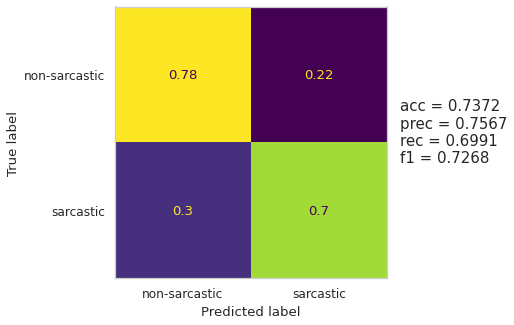

In [ ]:
evaluate(model, tokenized_data['X_val'], data['y_val'])

In [ ]:
show_errors(model, raw_data['X_val'].values, tokenized_data['X_val'], data['y_val'])

False negatives:
---------------------------
I got it to go once and it was soggy once I got home................
Why should I do this when I have Mifune?
second world nations need a colorful escape from living in a depressing shithole
This.
Tsm vs we

False positives:
---------------------------
Because he always bet with other peoples money; never his own.
Knowledge is knowing a tomato is a fruit, wisdom is knowing not to put it in a fruit salad.
ARTIFICIAL SCARCITY IS A BAD THING!
It's the religion of peace.
That long xbox 360 controller cord does come in handy


In [ ]:
model.save(root+'gru')

INFO:tensorflow:Assets written to: /content/drive/My Drive/surely_not_sarcasm_data/gru/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/surely_not_sarcasm_data/gru/assets


## pretrained embeddings
*up to date (25.03.2022)*

In [18]:
model = Sequential([
    Embedding(input_dim=input_dim, output_dim=100, input_length=maxlen,
              mask_zero=True, weights=[emb_matrix_comment], trainable=True,
              embeddings_regularizer=L1L2(l1=3e-6, l2=3e-6)),
    GRU(100, dropout=0.4),
    Dense(1, activation='sigmoid')
])

es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, restore_best_weights=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit = model.fit(tokenized_data['X_train'], data['y_train'], batch_size=128, epochs=50, callbacks=[es],
                validation_data=(tokenized_data['X_val'], data['y_val']))

Epoch 1/50
6002/6002 [==============================] - 414s 68ms/step - loss: 0.9350 - accuracy: 0.7009 - val_loss: 0.6482 - val_accuracy: 0.7241
Epoch 2/50
6002/6002 [==============================] - 413s 69ms/step - loss: 0.6224 - accuracy: 0.7252 - val_loss: 0.5978 - val_accuracy: 0.7324
Epoch 3/50
6002/6002 [==============================] - 414s 69ms/step - loss: 0.5937 - accuracy: 0.7320 - val_loss: 0.5829 - val_accuracy: 0.7368
Epoch 4/50
6002/6002 [==============================] - 417s 69ms/step - loss: 0.5829 - accuracy: 0.7370 - val_loss: 0.5785 - val_accuracy: 0.7394
Epoch 5/50
6002/6002 [==============================] - 410s 68ms/step - loss: 0.5776 - accuracy: 0.7412 - val_loss: 0.5755 - val_accuracy: 0.7418
Epoch 6/50
6002/6002 [==============================] - 407s 68ms/step - loss: 0.5753 - accuracy: 0.7434 - val_loss: 0.5761 - val_accuracy: 0.7417
Epoch 7/50
6002/6002 [==============================] - 408s 68ms/step - loss: 0.5736 - accuracy: 0.7455 - val_loss: 0

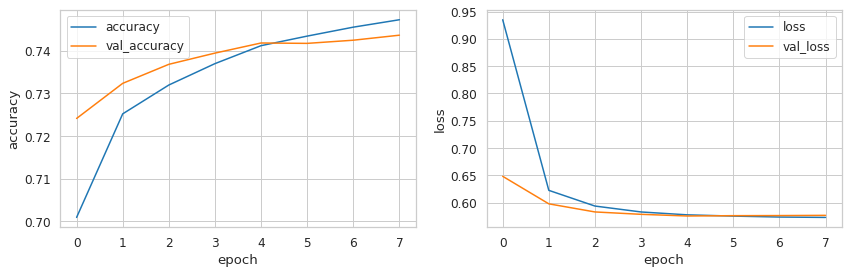

In [19]:
plot_history(fit)

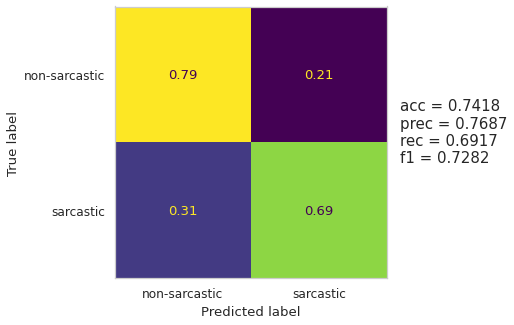

In [20]:
evaluate(model, tokenized_data['X_val'], data['y_val'])

In [21]:
show_errors(model, raw_data['X_val'].values, tokenized_data['X_val'], data['y_val'])

False negatives:
---------------------------
I need to feel better about myself and my irrational hatred of everyone who isn't exactly like me
I think Jay and Silent Bob should be the True Detectives.
I am suddenly no longer gay at that mental image HALLELUJAH THE RAY COMFORT HAS CURED ME OF MY HOMOSEXUAL DESIRES PRAISE THE LOOORRRDDDD
PS4 unlocked 7th core.
The pianist is shit

False positives:
---------------------------
WTF BRO STEELIN MY CS idc bout your item gg report the supp ff@20
It seems like the LU tutoring has already paid off with flair and skill, lets hope miller brings some poise in his game!
smart, its for advertising the more you show of your players the more skrilla you get
It isn't racist, it is just the term we use for black people we don't like :)
That is just the odorless paint thinner.


In [22]:
model.save(root+'models/gru_glove100_regularized')

INFO:tensorflow:Assets written to: /content/drive/My Drive/surely_not_sarcasm_data/models/gru_glove100_regularized/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/surely_not_sarcasm_data/models/gru_glove100_regularized/assets


In [23]:
y_pred = model.predict(tokenized_data['X_val'])

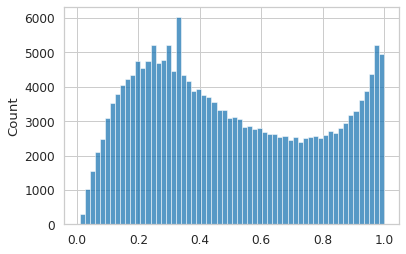

In [24]:
sns.histplot(x=y_pred.flatten());

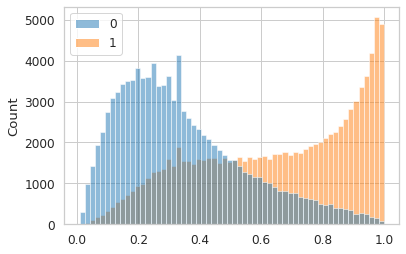

In [25]:
sns.histplot(x=y_pred.flatten(), hue=data['y_val']);

In [27]:
thresholds = np.arange(0, 1, 0.01)
f1_scores = [f1_score(data['y_val'], y_pred > thr) for thr in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
best_threshold, round(np.max(f1_scores), 4)

(0.38, 0.7466)

In [28]:
thresholds = np.arange(0, 1, 0.01)
acc_scores = [accuracy_score(data['y_val'], y_pred > thr) for thr in thresholds]
best_threshold = thresholds[np.argmax(acc_scores)]
best_threshold, round(np.max(acc_scores), 4)

(0.51, 0.7421)

# context

In [29]:
train_data = {'comment': tokenized_data['X_train'], 'parent': tokenized_data['X_train_par']}
val_data = {'comment': tokenized_data['X_val'], 'parent': tokenized_data['X_val_par']}

In [30]:
def build_rnn(input_layer, embedding_matrix, maxlen, reg=1e-6):
    x = Embedding(input_dim=input_dim, output_dim=vec_len, input_length=maxlen,
                  mask_zero=True, weights=[embedding_matrix], trainable=True,
                  embeddings_regularizer=L1L2(l1=reg, l2=reg))(input_layer)
    x = GRU(100, dropout=0.4)(x)

    return x

In [31]:
comment_input =  keras.Input(shape=(None,), name='comment')
parent_input = keras.Input(shape=(None,), name='parent')

comment_rnn = build_rnn(comment_input, emb_matrix_comment, maxlen, reg=3e-6)
parent_rnn = build_rnn(parent_input, emb_matrix_parent, maxlen_parent, reg=3e-6)

x = Concatenate()([comment_rnn, parent_rnn])
x = Dense(100, activation='elu', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, restore_best_weights=True)

model = keras.Model(inputs=[comment_input, parent_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit = model.fit(train_data, data['y_train'], epochs=50, batch_size=128, callbacks=[es],
                validation_data=(val_data, data['y_val']))

Epoch 1/50
6002/6002 [==============================] - 1037s 171ms/step - loss: 1.3046 - accuracy: 0.6955 - val_loss: 0.6715 - val_accuracy: 0.7266
Epoch 2/50
6002/6002 [==============================] - 1031s 172ms/step - loss: 0.6395 - accuracy: 0.7256 - val_loss: 0.6050 - val_accuracy: 0.7348
Epoch 3/50
6002/6002 [==============================] - 1014s 169ms/step - loss: 0.6049 - accuracy: 0.7332 - val_loss: 0.5887 - val_accuracy: 0.7393
Epoch 4/50
6002/6002 [==============================] - 1022s 170ms/step - loss: 0.5932 - accuracy: 0.7393 - val_loss: 0.5844 - val_accuracy: 0.7423
Epoch 5/50
6002/6002 [==============================] - 1017s 169ms/step - loss: 0.5882 - accuracy: 0.7423 - val_loss: 0.5807 - val_accuracy: 0.7453
Epoch 6/50
6002/6002 [==============================] - 1006s 168ms/step - loss: 0.5851 - accuracy: 0.7464 - val_loss: 0.5791 - val_accuracy: 0.7468
Epoch 7/50
6002/6002 [==============================] - 1022s 170ms/step - loss: 0.5842 - accuracy: 0.7485

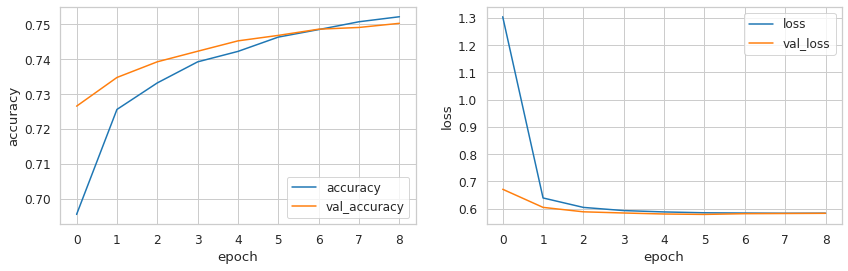

In [32]:
plot_history(fit)

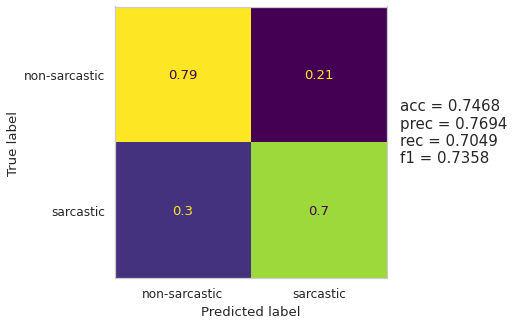

In [33]:
evaluate(model, (tokenized_data['X_val'], tokenized_data['X_val_par']), data['y_val'])

In [34]:
show_errors(model, raw_data['X_val'].values, (tokenized_data['X_val'], tokenized_data['X_val_par']),
            data['y_val'], X_parents=raw_data['X_val_par'].values)

False negatives:
---------------------------
parent: From a personal point: I am against the further legalization of drugs. I am sorry, but it simply has a horrendous stench. I just cannot stand it; goes for regular tobacco as well (which therefore I would say should be criminalized). This is a personal preference on which I thus base my vote like most would in the end. However, at the same time I lack proper knowledge to form an educated opinion on this matter and cannot say anything on dangers or the like. I do find that neither camp uses scientific data objectively.
comment: Hence why I vote against foreigners, I don't have an issue with them but it's the smell of curry that annoys me.

parent: What's behind the "kiss of death" moniker?
comment: Syphilis

parent: The fat chick behind him wants that chip
comment: Eh hem "Overly nourished"

parent: This is the worst post of today and you should feel bad and go make yourself a cup of tea and look down at the cup of tea waiting for the 

In [35]:
model.save(root+'models/context_rnn')

INFO:tensorflow:Assets written to: /content/drive/My Drive/surely_not_sarcasm_data/models/context_rnn/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/surely_not_sarcasm_data/models/context_rnn/assets
